# Laboratory work 4
## DataFrames Merging, Data Aggregation and Data Visualization
## Learning Pandas methods for data merging and aggregation.
### by Skuratovets Polina KN-222b.e

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Task 1. Load the energy data from the file “En_In.xls”, which is a list of indicators of energy supply and renewable electricity production, and put into a DataFrame.

In [2]:
df = pd.read_excel(
    io='En_In.xls',
    header=17,
    nrows=227,
    usecols="C:F",
    names=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
)

df.index = range(1, len(df) + 1)

df

,Country,Energy Supply,Energy Supply per Capita,% Renewable
1,Afghanistan,321,10,78.669280
2,Albania,102,35,100.000000
3,Algeria,1959,51,0.551010
4,American Samoa,...,...,0.641026
5,Andorra,9,121,88.695650
...,...,...,...,...
223,Viet Nam,2554,28,45.321520
224,Wallis and Futuna Islands,0,26,0.000000
225,Yemen,344,13,0.000000
226,Zambia,400,26,99.714670


## Task 2. Convert ‘Energy Supply’ to gigajoules 
### (Note: there are 1,000,000 gigajoules in a petajoule). For all countries which have missing data (e.g. data with "...") make sure this is reflected as np.NaN values.

In [3]:
df.iloc[:, 1:] = df.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
df['Energy Supply'] *= (10**6)
df

,Country,Energy Supply,Energy Supply per Capita,% Renewable
1,Afghanistan,321000000.0,10.0,78.669280
2,Albania,102000000.0,35.0,100.000000
3,Algeria,1959000000.0,51.0,0.551010
4,American Samoa,NaN,NaN,0.641026
5,Andorra,9000000.0,121.0,88.695650
...,...,...,...,...
223,Viet Nam,2554000000.0,28.0,45.321520
224,Wallis and Futuna Islands,0.0,26.0,0.000000
225,Yemen,344000000.0,13.0,0.000000
226,Zambia,400000000.0,26.0,99.714670


## Task 3.There are several countries with numbers and/or parenthesis in their name.
## Be sure to remove these, e.g. 'Bolivia (Plurinational State of)' should be ‘Bolivia’, ‘Switzerland17’ should be Switzerland’.

In [4]:
df['Country'] = df['Country'].str.replace(r'\s*\(.*\)|\d+', '', regex=True)

df['Country'] = df['Country'].str.strip()

df.loc[df['Country'].isin(['Bolivia', 'Switzerland'])]

,Country,Energy Supply,Energy Supply per Capita,% Renewable
25,Bolivia,336000000.0,32.0,31.47712
198,Switzerland,1113000000.0,136.0,57.74548


## Task 4. Rename the following list of countries:
### "Republic of Korea": "South Korea",
### "United States of America": "United States", "
### United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
### "China, Hong Kong Special Administrative Region": "Hong Kong"

In [5]:
countries = {
    "Republic of Korea": "South Korea",
    "United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "China, Hong Kong Special Administrative Region": "Hong Kong"
}

df['Country'] = df['Country'].replace(countries)

df.loc[df['Country'].isin(['South Korea', 'United States', 'United Kingdom', 'Hong Kong'])]

,Country,Energy Supply,Energy Supply per Capita,% Renewable
44,Hong Kong,585000000.0,82.0,0.000000
165,South Korea,11007000000.0,221.0,2.279353
215,United Kingdom,7920000000.0,124.0,10.600470
217,United States,90838000000.0,286.0,11.570980


### Expected output for tasks 1,2,3,4

In [6]:
df.loc[df['Country'].isin(['American Samoa', 'South Korea', 'Bolivia'])]

,Country,Energy Supply,Energy Supply per Capita,% Renewable
4,American Samoa,NaN,NaN,0.641026
25,Bolivia,336000000.0,32.0,31.477120
165,South Korea,11007000000.0,221.0,2.279353


## Task 5. load the GDP data from the file "gpd.esv", which is a sv containing countries' GDP from 1960 to 2015 from World Bank.
## Make sure to skip the header, and rename the following list of countries:
### "Korea, Rep.": "South Korea"
### "Iran, Islamic Rep.": "Iran"
### "Hong Kong SAR, China": "Hong Kong"

In [7]:
gdp = pd.read_csv(
    "gpd.csv",
    skiprows=4
)

replace = {
    "Korea, Rep.": "South Korea",
    "Iran, Islamic Rep.": "Iran",
    "Hong Kong SAR, China": "Hong Kong"
}

gdp['Country Name'] = gdp['Country Name'].replace(replace)


gdp.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN


In [8]:
gdp.loc[gdp['Country Name'].isin(['South Korea', 'Iran', 'Hong Kong'])]

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
93,Hong Kong,HKG,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,1.764691e+10,...,2.019164e+11,2.149698e+11,2.195440e+11,2.141452e+11,2.286377e+11,2.396459e+11,2.437206e+11,2.512081e+11,2.577757e+11,2.638606e+11
109,Iran,IRN,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,5.500820e+10,6.072406e+10,6.552689e+10,7.014134e+10,7.608598e+10,8.904776e+10,...,3.895523e+11,4.250646e+11,4.289909e+11,4.389208e+11,4.677902e+11,4.853309e+11,4.532569e+11,4.445926e+11,4.639027e+11,NaN
123,South Korea,KOR,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,2.757696e+10,2.893825e+10,2.964966e+10,3.247578e+10,3.493136e+10,3.674434e+10,...,9.410199e+11,9.924316e+11,1.020510e+12,1.027730e+12,1.094499e+12,1.134796e+12,1.160809e+12,1.194429e+12,1.234340e+12,1.266580e+12


## Task 6. Load the Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology from the file "scimagor.xlsx", which ranks countries based on their journal contributions in the aforementioned area.

In [9]:
sciamgo = pd.read_excel(
    io='scimagojr.xlsx',
)

sciamgo.head()

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.70,138
1,2,United States,96661,94747,792274,265436,8.20,230
2,3,Japan,30504,30287,223024,61554,7.31,134
3,4,United Kingdom,20944,20357,206091,37874,9.84,139
4,5,Russian Federation,18534,18301,34266,12422,1.85,57


## Task 7. Join the three datasets from tasks 1-6 into a new dataset (using the intersection of country names).
 - Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank I through 15).
 - The index of this DataFrame should be the name of the country, and the columns should be ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'].
### You should obtain a DataFrame with 15 rows and 20 columns.

In [10]:
gdp.rename(columns={'Country Name': 'Country'}, inplace=True)
sciamgo15 = sciamgo[sciamgo['Rank'] <= 15]
gdp10 = gdp[['Country'] + [str(year) for year in range(2006, 2016)]]

merged = pd.merge(sciamgo15, gdp10, on='Country', how='inner')

data = pd.merge(merged, df, on='Country', how='inner')

data.set_index('Country', inplace=True)

columns = ['Rank', 'Documents', 'Citable documents', 'Citations', 
           'Self-citations', 'Citations per document', 'H index', 
           'Energy Supply', 'Energy Supply per Capita', '% Renewable'] + \
          [str(year) for year in range(2006, 2016)]

data = data[columns]

data.head(3)

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,127191000000.0,93.0,19.75491,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,90838000000.0,286.0,11.57098,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,18984000000.0,149.0,10.23282,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12


In [11]:
data.shape

(15, 20)

## Task 8. Create a function to define what are the top 15 countries for average GDP over the last 10 years?
### This function should return a Series with 15 countries and their average GDP sorted in descending order.

In [12]:
def task_eight():
    top_15 = data.loc[:, '2006':'2015'].mean(axis=1, skipna=True).sort_values(ascending=False)
    top_15.name='avgGDP'
    return top_15

In [13]:
task_eight()

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
Name: avgGDP, dtype: float64

## Task 9. Create a function to define by how much had the GDP changed over the past 10 year for the country with the 5th largest average GDP?

In [14]:
def task_nine():
    top15 = task_eight()
    country_name = top15.index[4]
    gdp_diff = (data.loc[country_name, '2015'] - data.loc[country_name, '2006']).item()
    return (country_name, gdp_diff)



In [15]:
task_nine()

('France', 153345695364.24023)

## Task 10. Create a function to define what country has the maximum % Renewable and what is the percentage?
### This function should return a tuple with the name of the country and the percentage.

In [16]:
def task_ten():
    max_country = data['% Renewable'].idxmax()
    max_value = data.loc[max_country,'% Renewable'].item()
    return (max_country, max_value)

In [17]:
task_ten()

('Brazil', 69.64803)

## Task 11. Create a column that estimates the population using Energy Supply and Energy Supply per capita. What is the sixth most populous country according to this estimate?
### This function should return a tuple with the name of the country and the population

In [18]:
def task_eleven():
    data['Population'] = data['Energy Supply'] / data['Energy Supply per Capita']
    country= data['Population'].sort_values(ascending=False).index[5]
    return (country, data.loc[country, 'Population'])

In [19]:
task_eleven()

('Japan', 127409395.97315437)

## Task 12. Create a column that estimates the number of citable documents per person.
### What is the correlation between the number of citable documents per capita and the energy supply per capita?
### Use the .corr method,(Pearson's correlation).
### This function should return a single number.

In [20]:
def task_twelve():
    data['Citable Documents per Capita'] = data['Citable documents'] / data['Population']
    corr=(data['Citable Documents per Capita'].corr(data['Energy Supply per Capita'])).item()
    return corr

In [21]:
task_twelve()

0.7940010435442946

## Task 13. Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15, and a O if the country's % Renewable value is below the median.
### This function should return a series whose index is the country name sorted in ascending order of rank.

In [22]:
def task_thirteen():
    median = data['% Renewable'].median()
    return (data['% Renewable'] >= median).astype(int)

In [23]:
task_thirteen()

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: % Renewable, dtype: int64

## Task 14. Use the following dictionary to group the Countries by Continent, then create a DataFrame that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.
### ContinentDict = {
### 'China': 'Asia'.
### 'United States: 'North America',
### 'Japan': 'Asia',
### 'United Kingdom': 'Europe',
### "Russian Federation': 'Europe,
### 'Canada': North America',
### 'Germany': 'Europe',
### 'India': 'Asia',
### 'France': 'Europe',
### 'South Korea': 'Asia',
### 'Italy': 'Europe',
### 'Spain': 'Europe', Iran' 'Asia',
### 'Australia: 'Australia',
### 'Brazil': 'South America'}
### This function should return a DataFrame with index named Continent ['Asia','Australia', 'Europe', 'North America', 'South America'] and columns ['size', 'sum', 'mean', 'std')

In [24]:
continent_dict = {
        'China': 'Asia',
        'United States': 'North America',
        'Japan': 'Asia',
        'United Kingdom': 'Europe',
        'Russian Federation': 'Europe',
        'Canada': 'North America',
        'Germany': 'Europe',
        'India': 'Asia',
        'France': 'Europe',
        'South Korea': 'Asia',
        'Italy': 'Europe',
        'Spain': 'Europe',
        'Iran': 'Asia',
        'Australia': 'Australia',
        'Brazil': 'South America'
    }

def task_forteen():
    data['Continent'] = data.index.map(continent_dict)
    return data.groupby('Continent')['Population'].agg(['size', 'sum', 'mean', 'std'])

In [25]:
task_forteen()

,size,sum,mean,std
Continent,,,,
Asia,5,2898666386.6106,579733277.32212,6.790979e+08
Australia,1,23316017.316017,23316017.316017,NaN
Europe,6,457929667.216372,76321611.202729,3.464767e+07
North America,2,352855249.48025,176427624.740125,1.996696e+08
South America,1,205915254.237288,205915254.237288,NaN


## Task 15. Create a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' 2015 GDP, and the color corresponds to the continent

In [26]:
def create_bubble_chart():
    %matplotlib widget
    continent_colors={'Australia': 'yellow','Asia': 'red', 'North America': 'blue', 'Europe': 'green',  'South America': 'orange'}
    data['Continent'] = data.index.map(continent_dict)
    x = data['Rank']
    y = data['% Renewable']
    bubble_sizes = data['2015'] / 10**9
    countries_colors = data['Continent'].map({
        'Australia': 'yellow','Asia': 'red', 'North America': 'blue', 'Europe': 'green',  'South America': 'orange'
    })
    plt.figure(figsize=(12, 8))
    plt.scatter(x, y, s=bubble_sizes, c=countries_colors, alpha=0.6, linewidth=0)
    for idx, country_name in enumerate(data.index):
        plt.text(x.iloc[idx], y.iloc[idx], country_name, fontsize=9, ha='center')
    plt.title('Bubble chart', fontsize=16)
    plt.xlabel('Rank', fontsize=13)
    plt.ylabel('% Renewable', fontsize=13)
    plt.xticks(range(1, 16))
    handles = []
    for continent, color in continent_colors.items():
        handles.append(plt.Line2D([0], [0], marker='o', color='w', label=continent,
                                    markerfacecolor=color, markersize=10))
    plt.legend(handles=handles, title='Continents')
    plt.show()

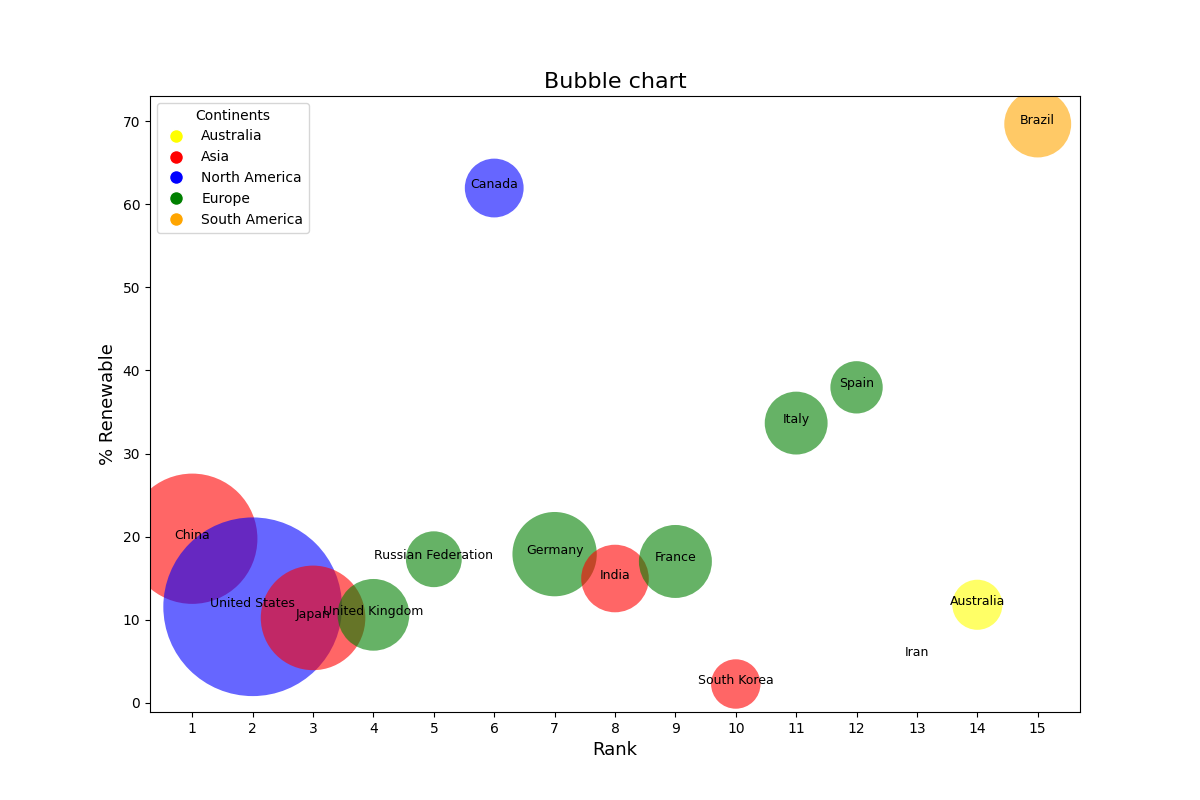

In [27]:
create_bubble_chart()